In [ ]:
# --------------------------------
# Lifelong learning
# Pembaruan : Vocabulary
# --------------------------------

In [1]:
pip install livelossplot

In [2]:
# Pemanggilan Pustaka
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.activations import softmax, relu
from livelossplot import PlotLossesKeras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
## Pendefinisian Modul Pembersihan Data
list_baku = pd.read_csv("/content/drive/My Drive/Data/list_kata_baku.csv", encoding='ISO-8859-1')

def clean_text(tweet):
    
    # Convert to lower case
    tweet = tweet.lower()
    
    # Clean www.* or https?://*
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)
    # Clean @username
    tweet = re.sub('@[^\s]+','',tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    # Clean punctuation
    tweet = re.sub(r"[^\w\s]",' ', tweet)
    # Clean number
    tweet = re.sub(r"[\d-]",'', tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #trim
    #tweet = tweet.strip('\'"')

    # Clean per Words
    words = tweet.split()
    tokens=[]
    for ww in words:
        #split repeated word
        for w in re.split(r'[-/\s]\s*', ww):
            #replace two or more with two occurrences
            pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
            w = pattern.sub(r"\1\1", w)
            #check if the word cosists of two or more alphabets
            val = re.search(r"^[a-zA-Z][a-zA-Z][a-zA-Z]*$", w)
            #add tokens
            if(w in list_baku):
                x=np.array(list_baku[list_baku["spell"]==w]["word"])
                w=x[0]
                tokens.append(w.lower())
            elif(w == 'rt' or val is None):
                continue
            else:
                tokens.append(w.lower())
    tweet = " ".join(tokens)
    return tweet

In [5]:
# Source Domain
# -------------

## Memuat semua data
sd1 = pd.read_csv("/content/drive/My Drive/Data/Capres_skripsi.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd2 = pd.read_csv("/content/drive/My Drive/Data/Ecom.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd3 = pd.read_csv("/content/drive/My Drive/Data/Shopback.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd4 = pd.read_csv("/content/drive/My Drive/Data/Grab.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
sd5 = pd.read_csv("/content/drive/My Drive/Data/Jenius.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')
dt = pd.read_csv("/content/drive/My Drive/Data/DANA.csv", usecols=["Sentimen", "Teks"], encoding='ISO-8859-1')

## Prapengolahan: mengganti nilai sentimen {-1,1} menjadi {0,1}
sd1['Sentimen'] = sd1['Sentimen'].replace(-1,0)
sd2['Sentimen'] = sd2['Sentimen'].replace(-1,0)
sd3['Sentimen'] = sd3['Sentimen'].replace(-1,0)
sd4['Sentimen'] = sd4['Sentimen'].replace(-1,0)
sd5['Sentimen'] = sd5['Sentimen'].replace(-1,0)
dt['Sentimen'] = dt['Sentimen'].replace(-1,0)


## Prapengolahan: pembersihan dataset
sd1['Teks'] = sd1['Teks'].map(lambda x: clean_text(x))
sd1 = sd1[sd1['Teks'].apply(lambda x: len(x.split()) >=1)]
sd2['Teks'] = sd2['Teks'].map(lambda x: clean_text(x))
sd2 = sd2[sd2['Teks'].apply(lambda x: len(x.split()) >=1)]
sd3['Teks'] = sd3['Teks'].map(lambda x: clean_text(x))
sd3 = sd3[sd3['Teks'].apply(lambda x: len(x.split()) >=1)]
sd4['Teks'] = sd4['Teks'].map(lambda x: clean_text(x))
sd4 = sd4[sd4['Teks'].apply(lambda x: len(x.split()) >=1)]
sd5['Teks'] = sd5['Teks'].map(lambda x: clean_text(x))
sd5 = sd5[sd5['Teks'].apply(lambda x: len(x.split()) >=1)]
dt['Teks'] = dt['Teks'].map(lambda x: clean_text(x))
dt = dt[dt['Teks'].apply(lambda x: len(x.split()) >=1)]

## Prapengolahan: tokenisasi
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sd1['Teks'])
tokenizer.fit_on_texts(sd2['Teks'])
tokenizer.fit_on_texts(sd3['Teks'])
tokenizer.fit_on_texts(sd4['Teks'])
tokenizer.fit_on_texts(sd5['Teks'])

## Prapengolahan: sequencing
sequences = tokenizer.texts_to_sequences(sd1['Teks'])
sd1_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd1_labels = np.array((sd1['Sentimen']))
sd1_labels = pd.get_dummies(sd1_labels)
sequences = tokenizer.texts_to_sequences(sd2['Teks'])
sd2_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd2_labels = np.array((sd2['Sentimen']))
sd2_labels = pd.get_dummies(sd2_labels)
sequences = tokenizer.texts_to_sequences(sd3['Teks'])
sd3_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd3_labels = np.array((sd3['Sentimen']))
sd3_labels = pd.get_dummies(sd3_labels)
sequences = tokenizer.texts_to_sequences(sd4['Teks'])
sd4_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd4_labels = np.array((sd4['Sentimen']))
sd4_labels = pd.get_dummies(sd4_labels)
sequences = tokenizer.texts_to_sequences(sd5['Teks'])
sd5_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
sd5_labels = np.array((sd5['Sentimen']))
sd5_labels = pd.get_dummies(sd5_labels)
sequences = tokenizer.texts_to_sequences(dt['Teks'])
dt_data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=80)
dt_labels = np.array((dt['Sentimen']))
dt_labels = pd.get_dummies(dt_labels)

sd1_data_train, sd1_data_test, sd1_labels_train, sd1_labels_test = train_test_split(sd1_data, sd1_labels, test_size=0.2, random_state=42, stratify= sd1_labels)
sd2_data_train, sd2_data_test, sd2_labels_train, sd2_labels_test = train_test_split(sd2_data, sd2_labels, test_size=0.2, random_state=42, stratify= sd2_labels)
sd3_data_train, sd3_data_test, sd3_labels_train, sd3_labels_test = train_test_split(sd3_data, sd3_labels, test_size=0.2, random_state=42, stratify= sd3_labels)
sd4_data_train, sd4_data_test, sd4_labels_train, sd4_labels_test = train_test_split(sd4_data, sd4_labels, test_size=0.2, random_state=42, stratify= sd4_labels)
sd5_data_train, sd5_data_test, sd5_labels_train, sd5_labels_test = train_test_split(sd5_data, sd5_labels, test_size=0.2, random_state=42, stratify= sd5_labels)

In [6]:
words1 = {x for x in ' '.join(sd1.Teks.str.lower().tolist()).split() if x.isalpha()}
words2 = {x for x in ' '.join(sd2.Teks.str.lower().tolist()).split() if x.isalpha()} 
words3 = {x for x in ' '.join(sd3.Teks.str.lower().tolist()).split() if x.isalpha()}
words4 = {x for x in ' '.join(sd4.Teks.str.lower().tolist()).split() if x.isalpha()} 
words5 = {x for x in ' '.join(sd5.Teks.str.lower().tolist()).split() if x.isalpha()}
words9 = {x for x in ' '.join(dt.Teks.str.lower().tolist()).split() if x.isalpha()} 

print(len(words1&words9))
print(len(words2&words9))
print(len(words3&words9))
print(len(words4&words9))
print(len(words5&words9))

921
1080
1382
1548
1584


In [7]:
vocabulary_size = len(tokenizer.word_index) + 1 
sequence_length = sd1_data.shape[1]                       
batch_size      = 32       

# 1. CNN


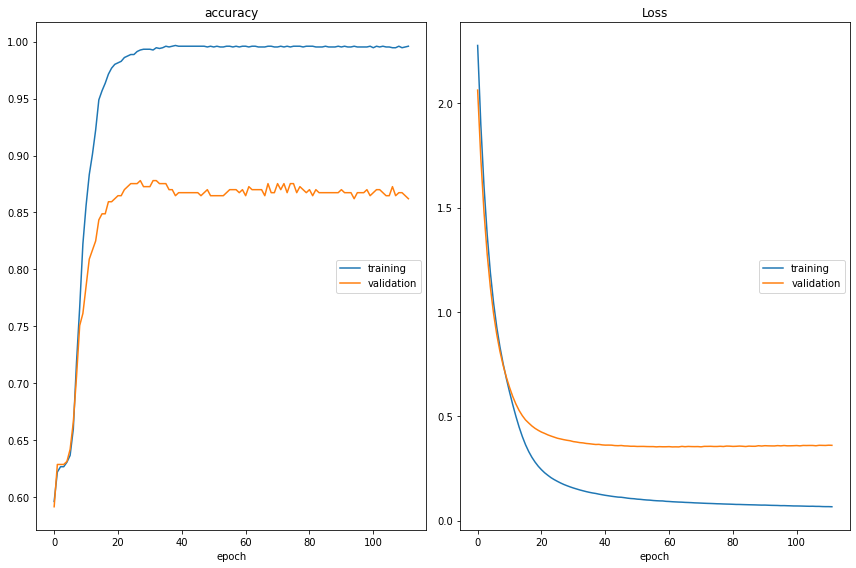

accuracy
	training         	 (min:    0.596, max:    0.997, cur:    0.996)
	validation       	 (min:    0.592, max:    0.878, cur:    0.862)
Loss
	training         	 (min:    0.066, max:    2.277, cur:    0.066)
	validation       	 (min:    0.353, max:    2.063, cur:    0.360)
37/37 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.7038
Source Accuracy:
Model CNN: [0.8700265288352966]
Target Accuracy:
Model CNN: [0.7038297653198242]


In [196]:
source_acc_1 = []
target_acc_1 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_1v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                               save_weights_only=True,
                                                               monitor='val_loss',
                                                               mode='min',
                                                               save_best_only=True)

#CNN
inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 128)(inputs)
conv = keras.layers.Conv1D(300, 5, activation='relu',kernel_regularizer= keras.regularizers.l2(0.01))(embedding)
pool = keras.layers.GlobalMaxPooling1D()(conv)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(pool)
modelcnn  = keras.models.Model(inputs=inputs, outputs=output)
modelcnn.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history11 = modelcnn.fit(sd1_data_train, sd1_labels_train, epochs=112, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

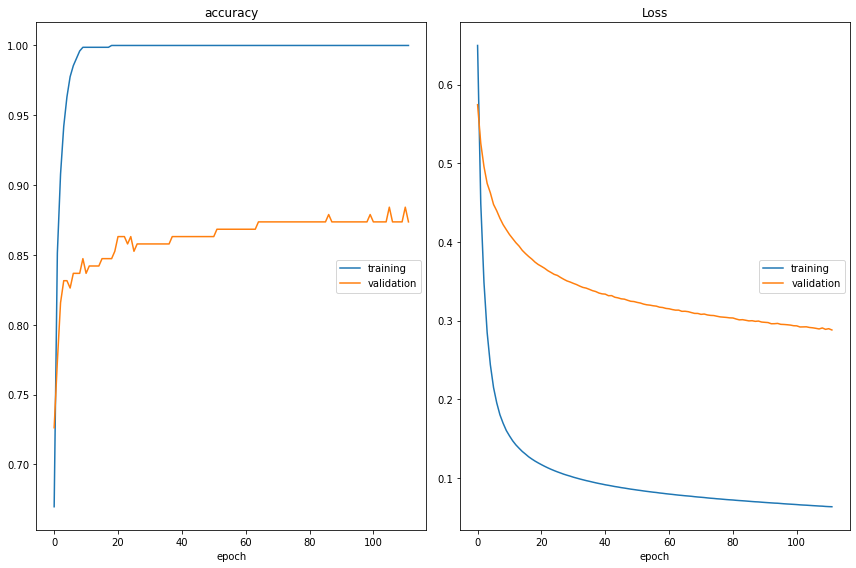

accuracy
	training         	 (min:    0.670, max:    1.000, cur:    1.000)
	validation       	 (min:    0.726, max:    0.884, cur:    0.874)
Loss
	training         	 (min:    0.063, max:    0.650, cur:    0.063)
	validation       	 (min:    0.288, max:    0.575, cur:    0.288)
37/37 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.8119
Source Accuracy:
Model CNN: [0.8700265288352966, 0.8461538553237915]
Target Accuracy:
Model CNN: [0.7038297653198242, 0.8119149208068848]


In [197]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_2v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history12 = modelcnn.fit(sd2_data_train, sd2_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd2_data_test, sd2_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

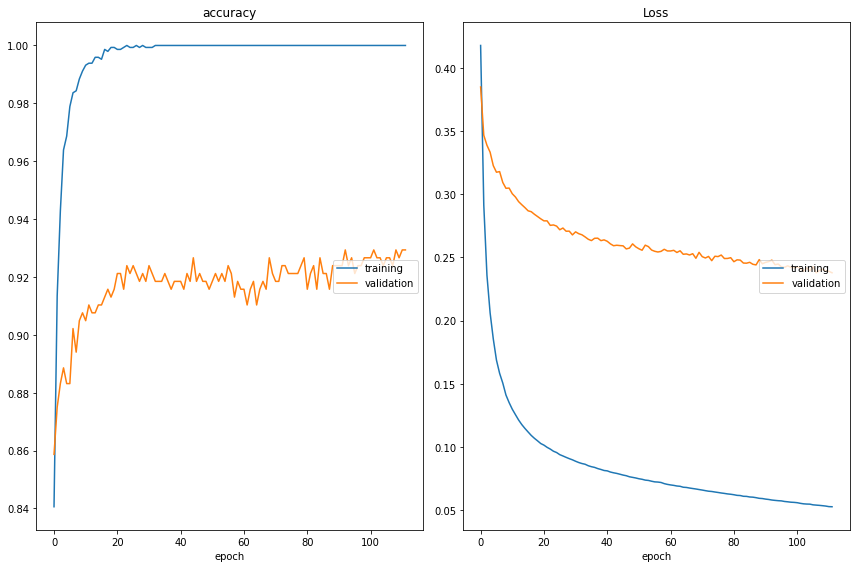

accuracy
	training         	 (min:    0.841, max:    1.000, cur:    1.000)
	validation       	 (min:    0.859, max:    0.929, cur:    0.929)
Loss
	training         	 (min:    0.053, max:    0.418, cur:    0.053)
	validation       	 (min:    0.238, max:    0.385, cur:    0.238)
37/37 [==============================] - 0s 3ms/step - loss: 0.3394 - accuracy: 0.8749
Source Accuracy:
Model CNN: [0.8700265288352966, 0.8461538553237915, 0.8169761300086975]
Target Accuracy:
Model CNN: [0.7038297653198242, 0.8119149208068848, 0.8748936057090759]


In [198]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_3v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history14 = modelcnn.fit(sd3_data_train, sd3_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd3_data_test, sd3_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

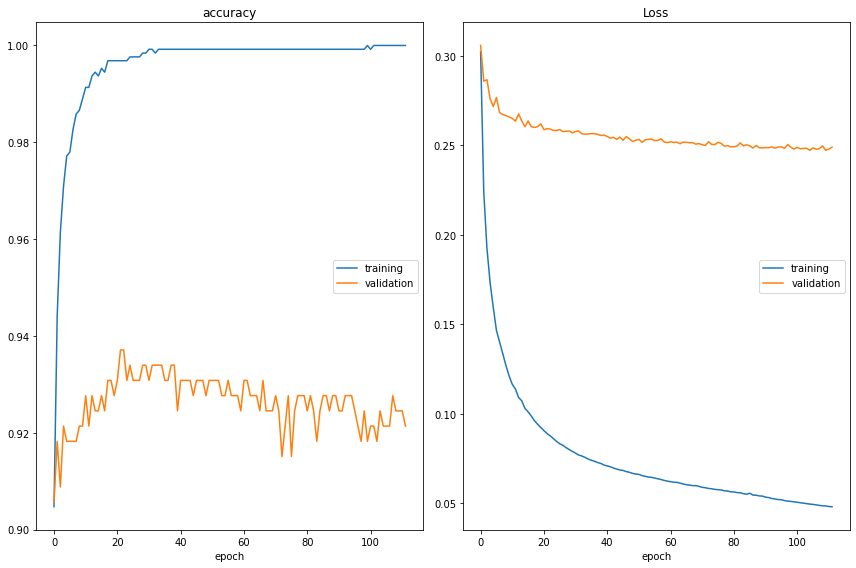

accuracy
	training         	 (min:    0.905, max:    1.000, cur:    1.000)
	validation       	 (min:    0.906, max:    0.937, cur:    0.921)
Loss
	training         	 (min:    0.048, max:    0.302, cur:    0.048)
	validation       	 (min:    0.247, max:    0.306, cur:    0.249)
37/37 [==============================] - 0s 3ms/step - loss: 0.3142 - accuracy: 0.8919
Source Accuracy:
Model CNN: [0.8700265288352966, 0.8461538553237915, 0.8169761300086975, 0.7692307829856873]
Target Accuracy:
Model CNN: [0.7038297653198242, 0.8119149208068848, 0.8748936057090759, 0.8919149041175842]


In [199]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_4v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history14 = modelcnn.fit(sd4_data_train, sd4_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd4_data_test, sd4_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

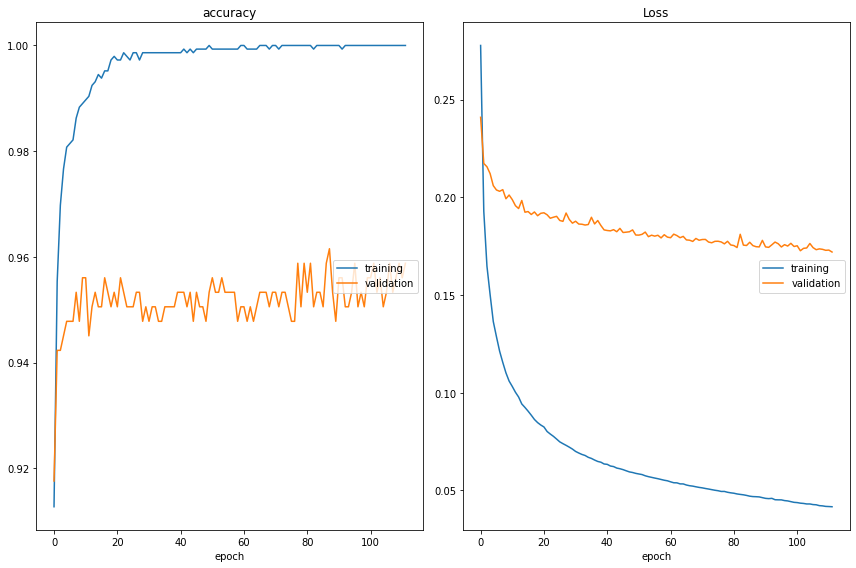

accuracy
	training         	 (min:    0.913, max:    1.000, cur:    1.000)
	validation       	 (min:    0.918, max:    0.962, cur:    0.959)
Loss
	training         	 (min:    0.042, max:    0.278, cur:    0.042)
	validation       	 (min:    0.172, max:    0.241, cur:    0.172)
37/37 [==============================] - 0s 3ms/step - loss: 0.2773 - accuracy: 0.9038
Source Accuracy:
Model CNN: [0.8700265288352966, 0.8461538553237915, 0.8169761300086975, 0.7692307829856873, 0.7877984046936035]
Target Accuracy:
Model CNN: [0.7038297653198242, 0.8119149208068848, 0.8748936057090759, 0.8919149041175842, 0.90382981300354]


In [200]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNN_5v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history15 = modelcnn.fit(sd5_data_train, sd5_labels_train, 
                epochs=112, 
                batch_size=batch_size,
                validation_data=(sd5_data_test, sd5_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnn.load_weights(checkpoint_filepath)

loss, acc = modelcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_1.append(acc)
loss, acc = modelcnn.evaluate(dt_data, dt_labels)
target_acc_1.append(acc)

print('Source Accuracy:')
print('Model CNN:', source_acc_1)
print('Target Accuracy:')
print('Model CNN:', target_acc_1)

#2. LSTM

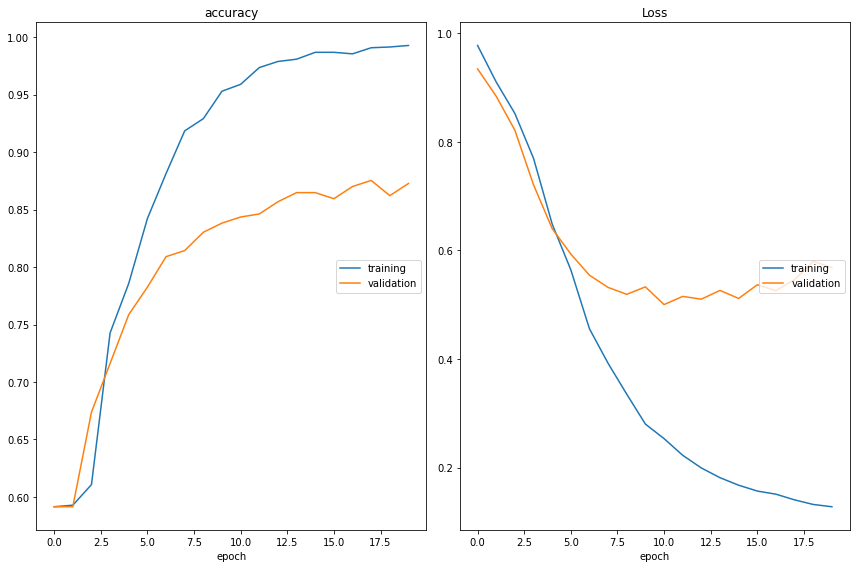

accuracy
	training         	 (min:    0.592, max:    0.993, cur:    0.993)
	validation       	 (min:    0.592, max:    0.875, cur:    0.873)
Loss
	training         	 (min:    0.128, max:    0.977, cur:    0.128)
	validation       	 (min:    0.500, max:    0.934, cur:    0.568)
37/37 [==============================] - 0s 5ms/step - loss: 0.7922 - accuracy: 0.6936
Source Accuracy:
Model LSTM: [0.8435013294219971]
Target Accuracy:
Model LSTM: [0.693617045879364]


In [201]:
source_acc_2 = []
target_acc_2 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_1v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 64)(inputs)
LSTM = keras.layers.LSTM(200,kernel_regularizer= keras.regularizers.l2(0.001), 
                              recurrent_regularizer= keras.regularizers.l2(0.001))(embedding)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(LSTM)
modellstm  = keras.models.Model(inputs=inputs, outputs=output)
modellstm.compile(optimizer=Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history21 = modellstm.fit(sd1_data_train, sd1_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

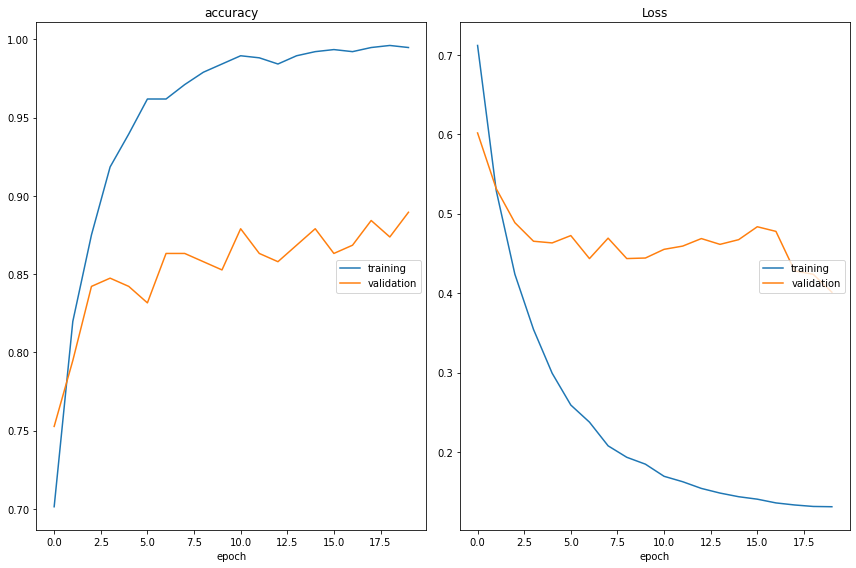

accuracy
	training         	 (min:    0.701, max:    0.996, cur:    0.995)
	validation       	 (min:    0.753, max:    0.889, cur:    0.889)
Loss
	training         	 (min:    0.131, max:    0.712, cur:    0.131)
	validation       	 (min:    0.401, max:    0.602, cur:    0.401)
37/37 [==============================] - 0s 6ms/step - loss: 0.8136 - accuracy: 0.7983
Source Accuracy:
Model LSTM: [0.8435013294219971, 0.8355437517166138]
Target Accuracy:
Model LSTM: [0.693617045879364, 0.7982978820800781]


In [202]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_2v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history22 = modellstm.fit(sd2_data_train, sd2_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd2_data_test, sd2_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

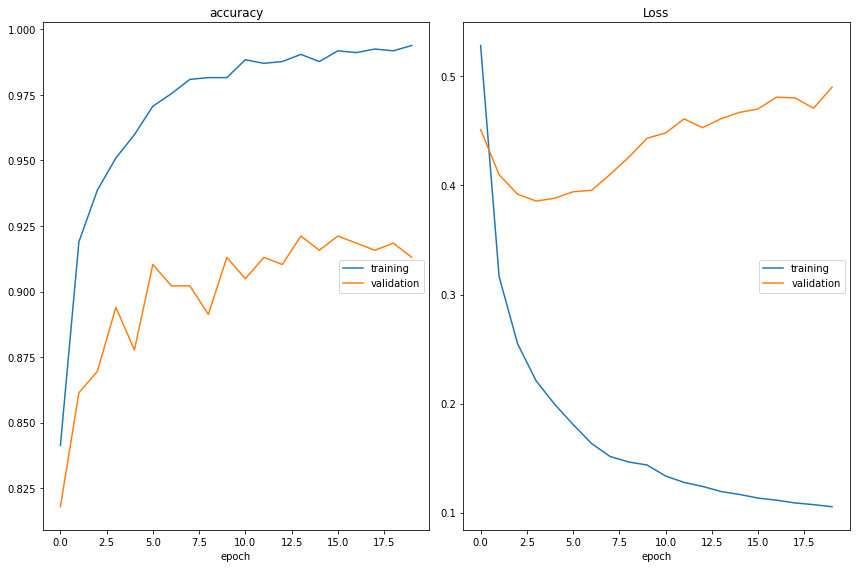

accuracy
	training         	 (min:    0.841, max:    0.994, cur:    0.994)
	validation       	 (min:    0.818, max:    0.921, cur:    0.913)
Loss
	training         	 (min:    0.105, max:    0.528, cur:    0.105)
	validation       	 (min:    0.386, max:    0.490, cur:    0.490)
37/37 [==============================] - 0s 5ms/step - loss: 0.4705 - accuracy: 0.8655
Source Accuracy:
Model LSTM: [0.8435013294219971, 0.8355437517166138, 0.8328912258148193]
Target Accuracy:
Model LSTM: [0.693617045879364, 0.7982978820800781, 0.8655319213867188]


In [203]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_3v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history23 = modellstm.fit(sd3_data_train, sd3_labels_train, 
                epochs=20, 
                batch_size=batch_size,
                validation_data=(sd3_data_test, sd3_labels_test),
                verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

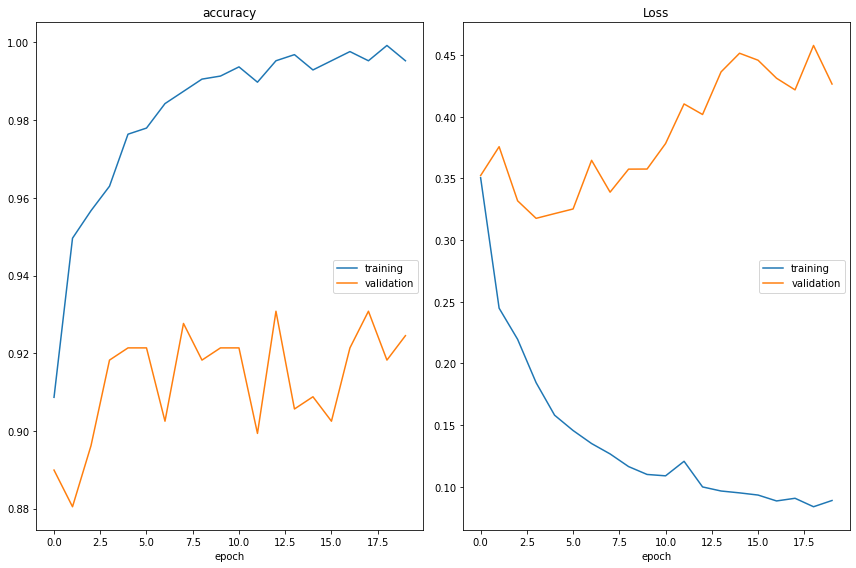

accuracy
	training         	 (min:    0.909, max:    0.999, cur:    0.995)
	validation       	 (min:    0.881, max:    0.931, cur:    0.925)
Loss
	training         	 (min:    0.084, max:    0.351, cur:    0.089)
	validation       	 (min:    0.318, max:    0.458, cur:    0.427)
37/37 [==============================] - 0s 5ms/step - loss: 0.4349 - accuracy: 0.8570
Source Accuracy:
Model LSTM: [0.8435013294219971, 0.8355437517166138, 0.8328912258148193, 0.8143236041069031]
Target Accuracy:
Model LSTM: [0.693617045879364, 0.7982978820800781, 0.8655319213867188, 0.8570212721824646]


In [204]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_4v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history24 = modellstm.fit(sd4_data_train, sd4_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd4_data_test, sd4_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

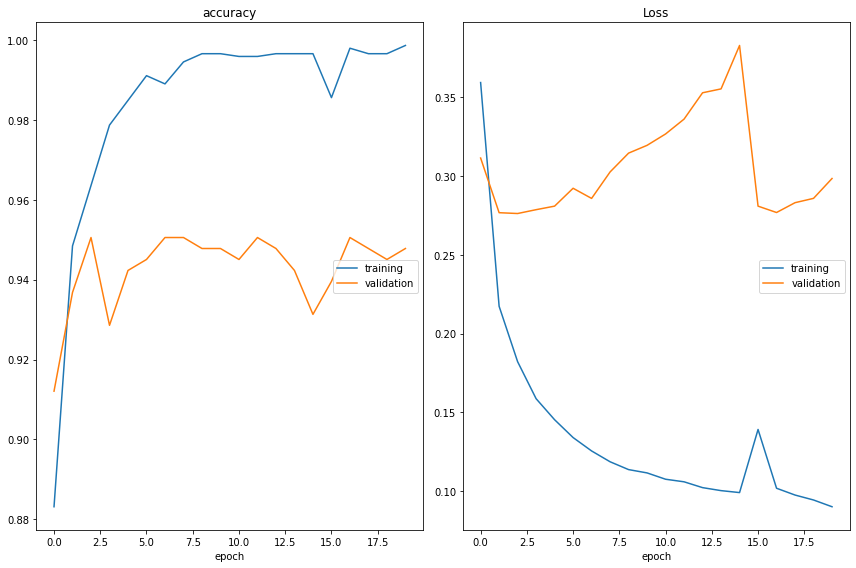

accuracy
	training         	 (min:    0.883, max:    0.999, cur:    0.999)
	validation       	 (min:    0.912, max:    0.951, cur:    0.948)
Loss
	training         	 (min:    0.090, max:    0.359, cur:    0.090)
	validation       	 (min:    0.276, max:    0.383, cur:    0.298)
37/37 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8919
Source Accuracy:
Model LSTM: [0.8435013294219971, 0.8355437517166138, 0.8328912258148193, 0.8143236041069031, 0.8461538553237915]
Target Accuracy:
Model LSTM: [0.693617045879364, 0.7982978820800781, 0.8655319213867188, 0.8570212721824646, 0.8919149041175842]


In [205]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTM_5v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history25 = modellstm.fit(sd5_data_train, sd5_labels_train, epochs=20, batch_size=batch_size,validation_data=(sd5_data_test, sd5_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstm.load_weights(checkpoint_filepath)

loss, acc = modellstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_2.append(acc)
loss, acc = modellstm.evaluate(dt_data, dt_labels)
target_acc_2.append(acc)

print('Source Accuracy:')
print('Model LSTM:', source_acc_2)
print('Target Accuracy:')
print('Model LSTM:', target_acc_2)

# 3. CNN-LSTM

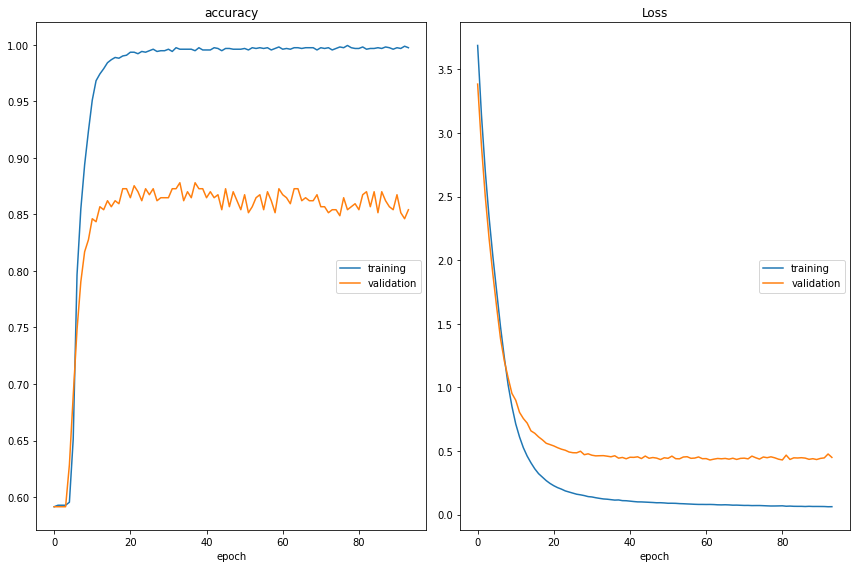

accuracy
	training         	 (min:    0.592, max:    0.999, cur:    0.997)
	validation       	 (min:    0.592, max:    0.878, cur:    0.854)
Loss
	training         	 (min:    0.061, max:    3.688, cur:    0.062)
	validation       	 (min:    0.429, max:    3.385, cur:    0.449)
37/37 [==============================] - 0s 4ms/step - loss: 0.7972 - accuracy: 0.7149
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078]
Target Accuracy:
Model CNN-LSTM: [0.714893639087677]


In [206]:
source_acc_3 = []
target_acc_3 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_1v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 64)(inputs)
conv = keras.layers.Conv1D(200, 3, activation='relu',kernel_regularizer= keras.regularizers.l2(0.01))(embedding)
pool = keras.layers.MaxPooling1D(2)(conv)
LSTM = keras.layers.LSTM(200,kernel_regularizer= keras.regularizers.l2(0.001), 
                              recurrent_regularizer= keras.regularizers.l2(0.01))(pool)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(LSTM)
modelcnnlstm = keras.models.Model(inputs=inputs, outputs=output)
modelcnnlstm.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history31 = modelcnnlstm.fit(sd1_data_train, sd1_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

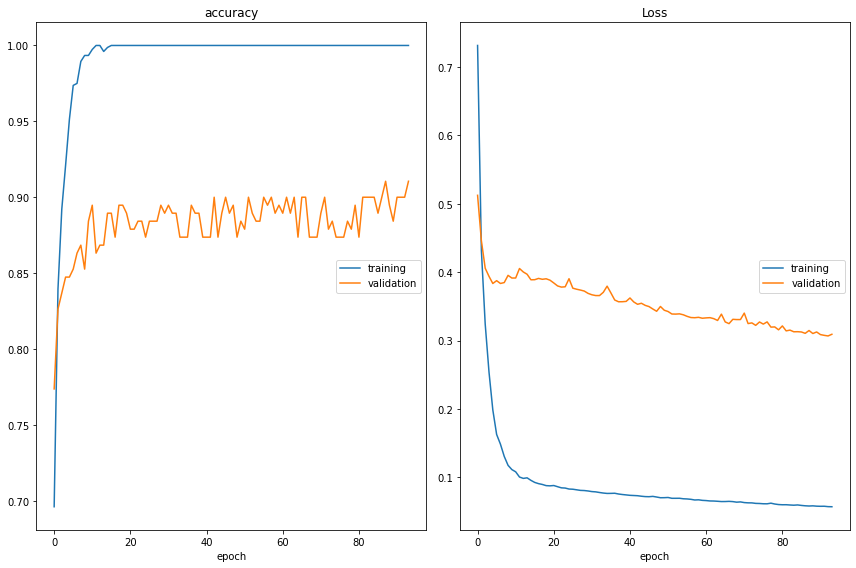

accuracy
	training         	 (min:    0.696, max:    1.000, cur:    1.000)
	validation       	 (min:    0.774, max:    0.911, cur:    0.911)
Loss
	training         	 (min:    0.057, max:    0.732, cur:    0.057)
	validation       	 (min:    0.307, max:    0.512, cur:    0.309)
37/37 [==============================] - 0s 5ms/step - loss: 0.5817 - accuracy: 0.8145
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8541114330291748]
Target Accuracy:
Model CNN-LSTM: [0.714893639087677, 0.8144680857658386]


In [207]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_2v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history32 = modelcnnlstm.fit(sd2_data_train, sd2_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd2_data_test, sd2_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

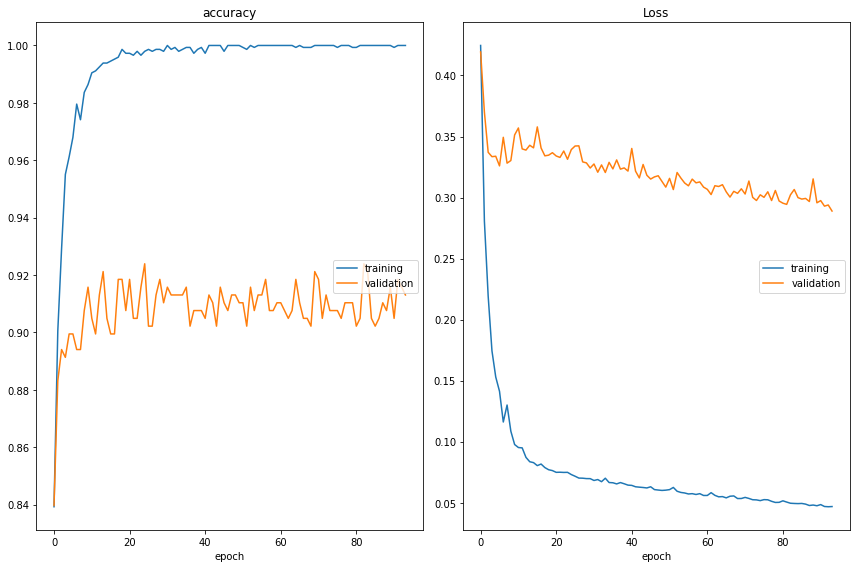

accuracy
	training         	 (min:    0.839, max:    1.000, cur:    1.000)
	validation       	 (min:    0.840, max:    0.924, cur:    0.913)
Loss
	training         	 (min:    0.047, max:    0.425, cur:    0.047)
	validation       	 (min:    0.289, max:    0.419, cur:    0.289)
37/37 [==============================] - 0s 4ms/step - loss: 0.4158 - accuracy: 0.8689
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8541114330291748, 0.8222811818122864]
Target Accuracy:
Model CNN-LSTM: [0.714893639087677, 0.8144680857658386, 0.8689361810684204]


In [208]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_3v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history33 = modelcnnlstm.fit(sd3_data_train, sd3_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd3_data_test, sd3_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

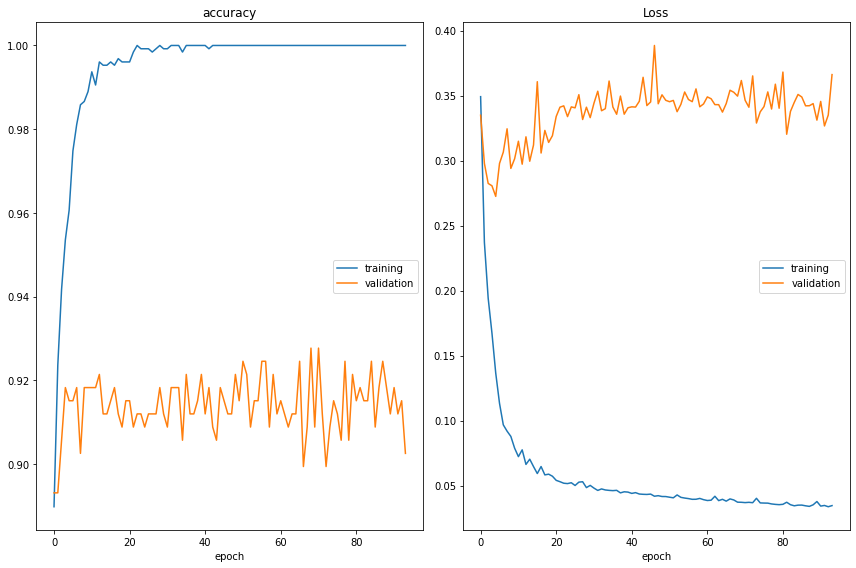

accuracy
	training         	 (min:    0.890, max:    1.000, cur:    1.000)
	validation       	 (min:    0.893, max:    0.928, cur:    0.903)
Loss
	training         	 (min:    0.034, max:    0.349, cur:    0.035)
	validation       	 (min:    0.272, max:    0.389, cur:    0.366)
37/37 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.8672
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8541114330291748, 0.8222811818122864, 0.7798408269882202]
Target Accuracy:
Model CNN-LSTM: [0.714893639087677, 0.8144680857658386, 0.8689361810684204, 0.8672340512275696]


In [209]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_4v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history34 = modelcnnlstm.fit(sd4_data_train, sd4_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd4_data_test, sd4_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

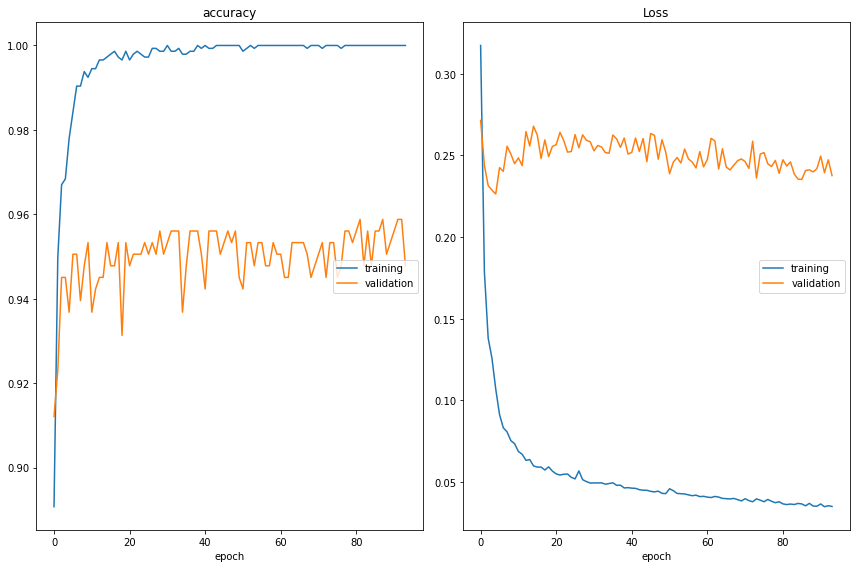

accuracy
	training         	 (min:    0.891, max:    1.000, cur:    1.000)
	validation       	 (min:    0.912, max:    0.959, cur:    0.948)
Loss
	training         	 (min:    0.035, max:    0.317, cur:    0.035)
	validation       	 (min:    0.226, max:    0.271, cur:    0.238)
37/37 [==============================] - 0s 5ms/step - loss: 0.3280 - accuracy: 0.8826
Source Accuracy:
Model CNN-LSTM: [0.8647214770317078, 0.8541114330291748, 0.8222811818122864, 0.7798408269882202, 0.7984085083007812]
Target Accuracy:
Model CNN-LSTM: [0.714893639087677, 0.8144680857658386, 0.8689361810684204, 0.8672340512275696, 0.882553219795227]


In [210]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/CNNLSTM_5v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history35 = modelcnnlstm.fit(sd5_data_train, sd5_labels_train, epochs=94, batch_size=batch_size,validation_data=(sd5_data_test, sd5_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modelcnnlstm.load_weights(checkpoint_filepath)

loss, acc = modelcnnlstm.evaluate(sd1_data_test, sd1_labels_test)
source_acc_3.append(acc)
loss, acc = modelcnnlstm.evaluate(dt_data, dt_labels)
target_acc_3.append(acc)

print('Source Accuracy:')
print('Model CNN-LSTM:', source_acc_3)
print('Target Accuracy:')
print('Model CNN-LSTM:', target_acc_3)

# 4. LSTM-CNN

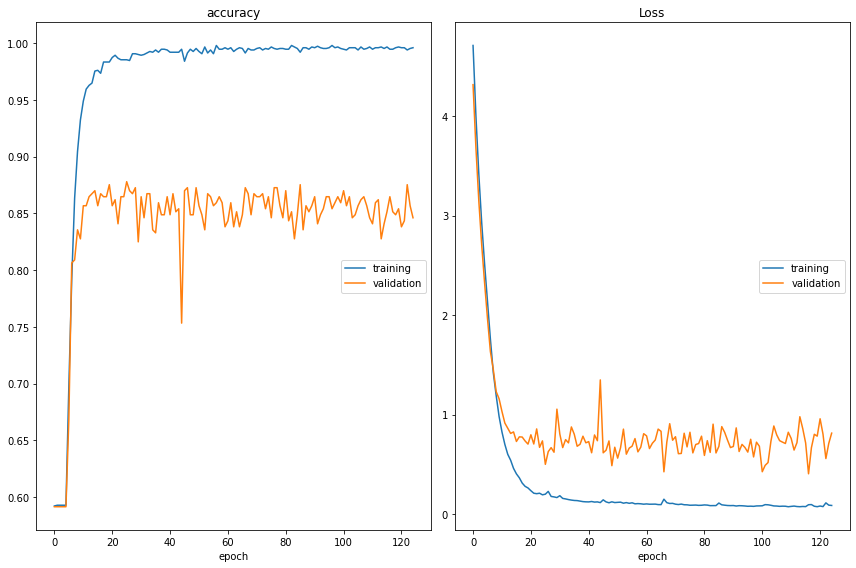

accuracy
	training         	 (min:    0.592, max:    0.998, cur:    0.996)
	validation       	 (min:    0.592, max:    0.878, cur:    0.846)
Loss
	training         	 (min:    0.073, max:    4.709, cur:    0.086)
	validation       	 (min:    0.404, max:    4.315, cur:    0.813)
37/37 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.6851
Source Accuracy:
Model LSTM-CNN: [0.8647214770317078]
Target Accuracy:
Model LSTM-CNN: [0.6851063966751099]


In [211]:
#LSTM-CNN

source_acc_4 = []
target_acc_4 = []

checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_1v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

inputs = keras.layers.Input(shape=(sequence_length,))
embedding = keras.layers.Embedding(vocabulary_size, 128)(inputs)
LSTM = keras.layers.LSTM(200,kernel_regularizer= keras.regularizers.l2(0.01), 
                              recurrent_regularizer= keras.regularizers.l2(0.001),return_sequences=True)(embedding)
conv = keras.layers.Conv1D(200, 3, activation='relu',kernel_regularizer= keras.regularizers.l2(0.01))(LSTM)
pool = keras.layers.GlobalMaxPooling1D()(conv)
output = keras.layers.Dense(2, activation='softmax',kernel_regularizer= keras.regularizers.l2(0.001))(pool)
modellstmcnn  = keras.models.Model(inputs=inputs, outputs=output)
modellstmcnn.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
history41 = modellstmcnn.fit(sd1_data_train, sd1_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd1_data_test, sd1_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

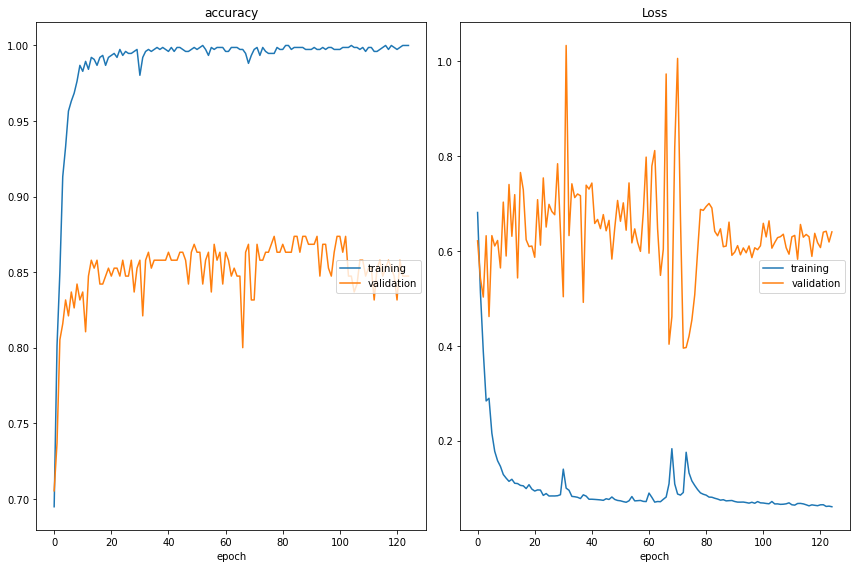

accuracy
	training         	 (min:    0.695, max:    1.000, cur:    1.000)
	validation       	 (min:    0.705, max:    0.874, cur:    0.847)
Loss
	training         	 (min:    0.061, max:    0.681, cur:    0.061)
	validation       	 (min:    0.395, max:    1.033, cur:    0.640)
37/37 [==============================] - 0s 6ms/step - loss: 0.5564 - accuracy: 0.8298
Source Accuracy:
Model LSTM-CNN: [0.8647214770317078, 0.8488063812255859]
Target Accuracy:
Model LSTM-CNN: [0.6851063966751099, 0.8297872543334961]


In [212]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_2v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history42 = modellstmcnn.fit(sd2_data_train, sd2_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd2_data_test, sd2_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

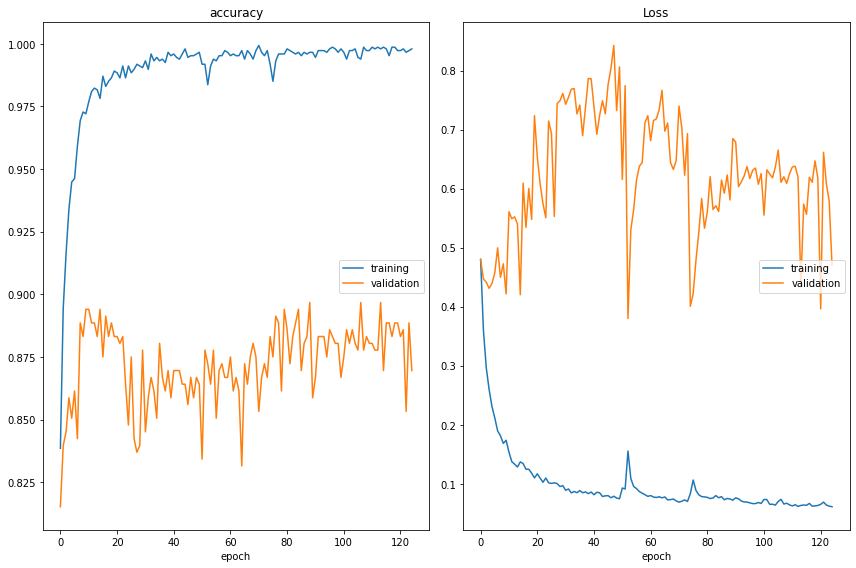

accuracy
	training         	 (min:    0.839, max:    0.999, cur:    0.998)
	validation       	 (min:    0.815, max:    0.897, cur:    0.870)
Loss
	training         	 (min:    0.061, max:    0.480, cur:    0.061)
	validation       	 (min:    0.380, max:    0.843, cur:    0.470)
37/37 [==============================] - 0s 6ms/step - loss: 0.4369 - accuracy: 0.8579
Source Accuracy:
Model LSTM-CNN: [0.8647214770317078, 0.8488063812255859, 0.8461538553237915]
Target Accuracy:
Model LSTM-CNN: [0.6851063966751099, 0.8297872543334961, 0.8578723669052124]


In [213]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_3v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history43 = modellstmcnn.fit(sd3_data_train, sd3_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd3_data_test, sd3_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

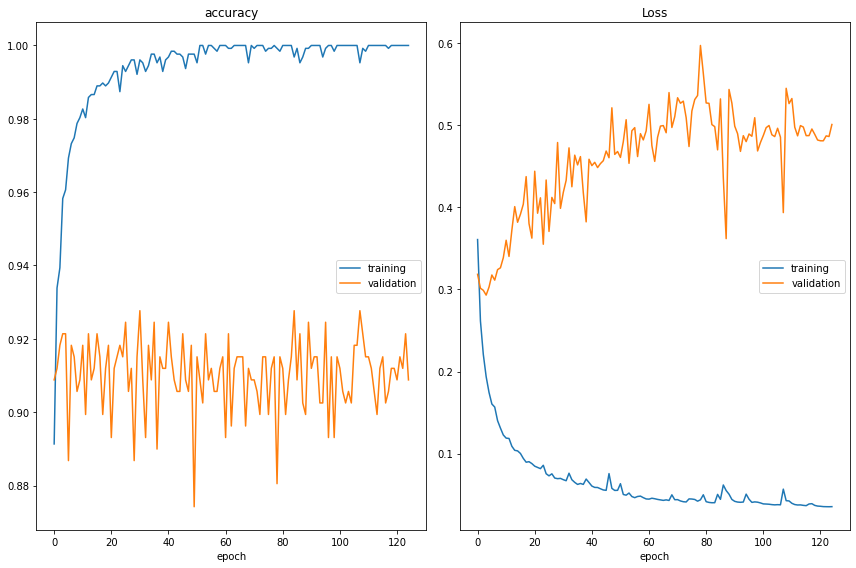

accuracy
	training         	 (min:    0.891, max:    1.000, cur:    1.000)
	validation       	 (min:    0.874, max:    0.928, cur:    0.909)
Loss
	training         	 (min:    0.035, max:    0.361, cur:    0.035)
	validation       	 (min:    0.293, max:    0.597, cur:    0.501)
37/37 [==============================] - 0s 6ms/step - loss: 0.3986 - accuracy: 0.8587
Source Accuracy:
Model LSTM-CNN: [0.8647214770317078, 0.8488063812255859, 0.8461538553237915, 0.8381962776184082]
Target Accuracy:
Model LSTM-CNN: [0.6851063966751099, 0.8297872543334961, 0.8578723669052124, 0.8587234020233154]


In [214]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_4v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True) 

history44 = modellstmcnn.fit(sd4_data_train, sd4_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd4_data_test, sd4_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

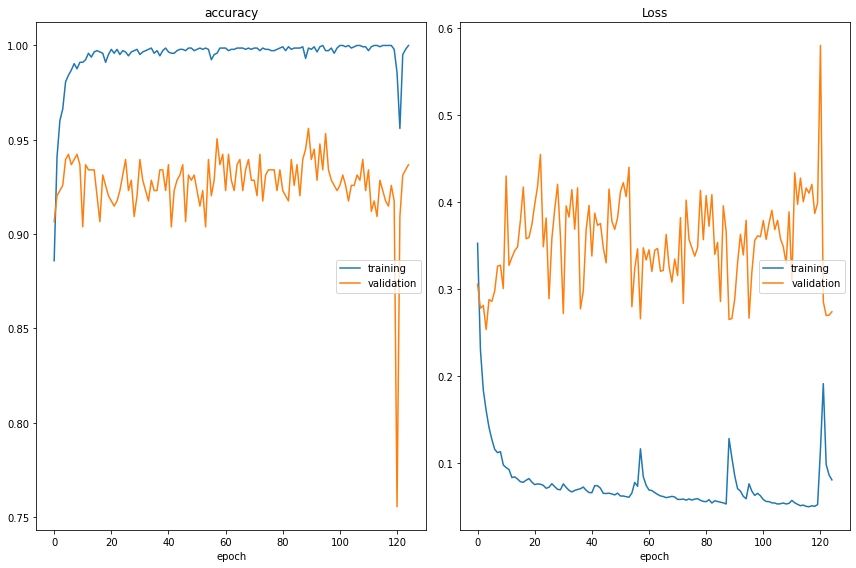

accuracy
	training         	 (min:    0.886, max:    1.000, cur:    1.000)
	validation       	 (min:    0.755, max:    0.956, cur:    0.937)
Loss
	training         	 (min:    0.050, max:    0.353, cur:    0.081)
	validation       	 (min:    0.254, max:    0.580, cur:    0.274)
37/37 [==============================] - 0s 6ms/step - loss: 0.4233 - accuracy: 0.8434
Source Accuracy:
Model LSTM-CNN: [0.8647214770317078, 0.8488063812255859, 0.8461538553237915, 0.8381962776184082, 0.8381962776184082]
Target Accuracy:
Model LSTM-CNN: [0.6851063966751099, 0.8297872543334961, 0.8578723669052124, 0.8587234020233154, 0.843404233455658]


In [215]:
checkpoint_filepath = '/content/drive/My Drive/ProgramSkripsi/LSTMCNN_5v'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

history45 = modellstmcnn.fit(sd5_data_train, sd5_labels_train, epochs=125, batch_size=batch_size,validation_data=(sd5_data_test, sd5_labels_test),verbose=0,callbacks=[[PlotLossesKeras(),model_checkpoint_callback]])

modellstmcnn.load_weights(checkpoint_filepath)

loss, acc = modellstmcnn.evaluate(sd1_data_test, sd1_labels_test)
source_acc_4.append(acc)
loss, acc = modellstmcnn.evaluate(dt_data, dt_labels)
target_acc_4.append(acc)

print('Source Accuracy:')
print('Model LSTM-CNN:', source_acc_4)
print('Target Accuracy:')
print('Model LSTM-CNN:', target_acc_4)

# Lifelong Learning

In [222]:
cum_source_acc_1 = []
cum_source_acc_2 = []
cum_source_acc_3 = []
cum_source_acc_4 = []

cum_target_acc_1 = []
cum_target_acc_2 = []
cum_target_acc_3 = []
cum_target_acc_4 = []

cum_source_acc_1.append(source_acc_1)
cum_source_acc_2.append(source_acc_2)
cum_source_acc_3.append(source_acc_3)
cum_source_acc_4.append(source_acc_4)

cum_target_acc_1.append(target_acc_1)
cum_target_acc_2.append(target_acc_2)
cum_target_acc_3.append(target_acc_3)
cum_target_acc_4.append(target_acc_4)

lok_1 = pd.DataFrame(cum_source_acc_1)
lok_2 = pd.DataFrame(cum_source_acc_2)
lok_3 = pd.DataFrame(cum_source_acc_3)
lok_4 = pd.DataFrame(cum_source_acc_4)

tk_1 = pd.DataFrame(cum_target_acc_1)
tk_2 = pd.DataFrame(cum_target_acc_2)
tk_3 = pd.DataFrame(cum_target_acc_3)
tk_4 = pd.DataFrame(cum_target_acc_4)

lok_1.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
lok_2.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
lok_3.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
lok_4.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']

tk_1.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
tk_2.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
tk_3.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']
tk_4.columns = ['SD 1','SD 2','SD 3','SD 4','SD 5']

lok_1.loc['mean CNN'] = lok_1.mean()
lok_2.loc['mean LSTM'] = lok_2.mean()
lok_3.loc['mean CNN-LSTM'] = lok_3.mean()
lok_4.loc['mean LSTM-CNN'] = lok_4.mean()

tk_1.loc['mean CNN'] = tk_1.mean()
tk_2.loc['mean LSTM'] = tk_2.mean()
tk_3.loc['mean CNN-LSTM'] = tk_3.mean()
tk_4.loc['mean LSTM-CNN'] = tk_4.mean()

print('Loss of Knowledge')
print('Model CNN:')
display(lok_1.loc['mean CNN'])

print('Model LSTM:')
display(lok_2.loc['mean LSTM'])

print('Model CNN-LSTM:')
display(lok_3.loc['mean CNN-LSTM'])

print('Model LSTM-CNN:')
display(lok_4.loc['mean LSTM-CNN'])

print('\n','\n','---------------------------------------------------------------------','\n','\n')

print('Transfer Knowledge')
print('Model CNN:')
display(tk_1.loc['mean CNN'])

print('Model LSTM:')
display(tk_2.loc['mean LSTM'])

print('Model CNN-LSTM:')
display(tk_3.loc['mean CNN-LSTM'])

print('Model LSTM-CNN:')
display(tk_4.loc['mean LSTM-CNN'])

Loss of Knowledge
Model CNN:


SD 1    0.872944
SD 2    0.847215
SD 3    0.812202
SD 4    0.756233
SD 5    0.785411
Name: mean CNN, dtype: float64

Model LSTM:


SD 1    0.846684
SD 2    0.840053
SD 3    0.835544
SD 4    0.834483
SD 5    0.828382
Name: mean LSTM, dtype: float64

Model CNN-LSTM:


SD 1    0.866843
SD 2    0.852255
SD 3    0.820690
SD 4    0.788594
SD 5    0.800796
Name: mean CNN-LSTM, dtype: float64

Model LSTM-CNN:


SD 1    0.862599
SD 2    0.850133
SD 3    0.834483
SD 4    0.826525
SD 5    0.830769
Name: mean LSTM-CNN, dtype: float64


 
 --------------------------------------------------------------------- 
 

Transfer Knowledge
Model CNN:


SD 1    0.697191
SD 2    0.813106
SD 3    0.880596
SD 4    0.895404
SD 5    0.905362
Name: mean CNN, dtype: float64

Model LSTM:


SD 1    0.644426
SD 2    0.759915
SD 3    0.857957
SD 4    0.865277
SD 5    0.872340
Name: mean LSTM, dtype: float64

Model CNN-LSTM:


SD 1    0.716681
SD 2    0.815319
SD 3    0.865872
SD 4    0.869191
SD 5    0.865192
Name: mean CNN-LSTM, dtype: float64

Model LSTM-CNN:


SD 1    0.678383
SD 2    0.790809
SD 3    0.863149
SD 4    0.869787
SD 5    0.879660
Name: mean LSTM-CNN, dtype: float64

Text(0.5, 1.0, 'Loss of Knowledge')

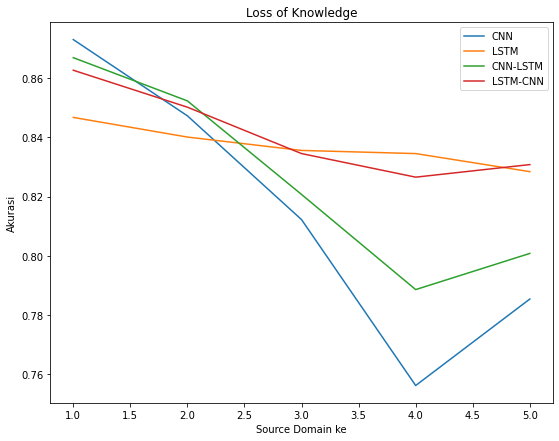

In [223]:
plt.rcParams["figure.figsize"] = [9,7]
plt.plot([1,2,3,4,5],lok_1.loc['mean CNN'],label='CNN')
plt.plot([1,2,3,4,5],lok_2.loc['mean LSTM'],label='LSTM')
plt.plot([1,2,3,4,5],lok_3.loc['mean CNN-LSTM'],label='CNN-LSTM')
plt.plot([1,2,3,4,5],lok_4.loc['mean LSTM-CNN'],label='LSTM-CNN')
plt.xlabel("Source Domain ke")
plt.ylabel("Akurasi")
plt.legend()
plt.title('Loss of Knowledge')

Text(0.5, 1.0, 'Transfer Knowledge')

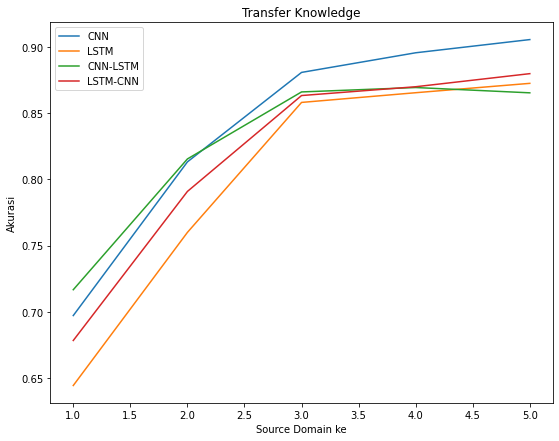

In [224]:
plt.rcParams["figure.figsize"] = [9,7]
plt.plot([1,2,3,4,5],tk_1.loc['mean CNN'],label='CNN')
plt.plot([1,2,3,4,5],tk_2.loc['mean LSTM'],label='LSTM')
plt.plot([1,2,3,4,5],tk_3.loc['mean CNN-LSTM'],label='CNN-LSTM')
plt.plot([1,2,3,4,5],tk_4.loc['mean LSTM-CNN'],label='LSTM-CNN')
plt.xlabel("Source Domain ke")
plt.ylabel("Akurasi")
plt.legend()
plt.title('Transfer Knowledge')

In [225]:
TK=pd.concat([tk_1,tk_2,tk_3,tk_4])
LOK=pd.concat([lok_1,lok_2,lok_3,lok_4])
TK.to_csv(r'/content/drive/My Drive/Data/TKv.csv')
LOK.to_csv(r'/content/drive/My Drive/Data/LOKv.csv')

In [226]:
pd.read_csv('/content/drive/My Drive/Data/TKv.csv')

,Unnamed: 0,SD 1,SD 2,SD 3,SD 4,SD 5
0,0,0.691064,0.817021,0.875745,0.890213,0.903830
1,1,0.720000,0.821277,0.890213,0.891915,0.917447
2,2,0.688511,0.821277,0.873191,0.900426,0.901277
3,3,0.702128,0.820426,0.884255,0.899574,0.907234
4,4,0.708936,0.806809,0.883404,0.901277,0.902128
5,5,0.682553,0.817021,0.887660,0.893617,0.901277
6,6,0.687660,0.808511,0.880000,0.899574,0.907234
7,7,0.717447,0.796596,0.884255,0.901277,0.904681
8,8,0.669787,0.810213,0.872340,0.884255,0.904681
9,9,0.703830,0.811915,0.874894,0.891915,0.903830


In [227]:
pd.read_csv('/content/drive/My Drive/Data/LOKv.csv')

,Unnamed: 0,SD 1,SD 2,SD 3,SD 4,SD 5
0,0,0.872679,0.840849,0.803714,0.763926,0.787798
1,1,0.875332,0.867374,0.809019,0.758621,0.803714
2,2,0.864721,0.848806,0.822281,0.758621,0.782493
3,3,0.870027,0.832891,0.811671,0.745358,0.779841
4,4,0.877984,0.846154,0.830239,0.779841,0.798409
5,5,0.875332,0.848806,0.814324,0.755968,0.787798
6,6,0.872679,0.846154,0.811671,0.758621,0.769231
7,7,0.875332,0.854111,0.811671,0.740053,0.785146
8,8,0.875332,0.840849,0.790451,0.732095,0.771883
9,9,0.870027,0.846154,0.816976,0.769231,0.787798
